In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import rpy2.robjects as robjects
%matplotlib inline

In [4]:
plt.rcParams['font.family'] = 'IPAgothic'

In [7]:
robj = robjects.r['load']('./data/.RData')

In [8]:
for row in robj:
    print(row)

.Random.seed
data.cum.core30
data.cum.core30.2
data.cum.return
data.cum.return2
data.cum.train
data.cum.train.2
data.log.core30
data.log.return
data.log.return2
data.price
Date
label
price4
return4
sample1
sample2
X.price
X.return
Y.price
Y.return
yindex


In [9]:
data = pd.DataFrame(np.array(robjects.r['return4']).T, columns=['板硝子', 'ヤマハ', 'ポーラHD', '武田薬品'])

In [10]:
data.head()

,板硝子,ヤマハ,ポーラHD,武田薬品
0,1.801851,-1.477132,3.318314,-0.557882
1,0.000000,-0.597017,0.039316,-0.139958
2,1.769958,0.894194,-1.744691,-1.980263
3,5.129329,5.344232,1.390291,1.277519
4,3.278982,2.087759,-0.514140,0.140944


In [11]:
data.mean()

板硝子      0.546755
ヤマハ      0.531140
ポーラHD    0.162315
武田薬品     0.279897
dtype: float64

In [19]:
# 収益率データの標準偏差でボラティリティを定義する。
# ヒストリカルデータを用いているので、ヒストリカル・ボラティリティと呼ばれる。
# 銘柄ごとに異なった収益率の母集団分布のデータの標準偏差を調べることに対応している。
# なお今後の収益率の採りうる値の大きさを推測している場合は、収益率データが得られた機関の母集団分布の特性が、
# その後の期間でも変わらないという仮定することが必要になる。
data.std(ddof=1)

板硝子      3.565816
ヤマハ      2.638556
ポーラHD    1.546933
武田薬品     1.133956
dtype: float64

(-16, 16)

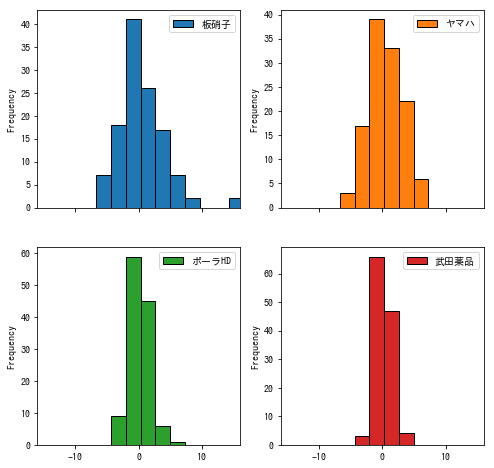

In [36]:
data.plot(kind='hist', subplots=True, layout=(2,2), figsize=(8,8), edgecolor='black')
plt.xlim([-16, 16])

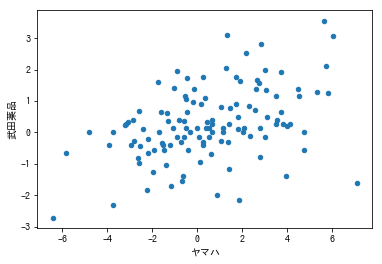

In [37]:
data.plot(kind='scatter', x='ヤマハ', y='武田薬品')

In [39]:
data.corr()

,板硝子,ヤマハ,ポーラHD,武田薬品
板硝子,1.000000,0.179624,0.004770,0.060213
ヤマハ,0.179624,1.000000,0.072823,0.414600
ポーラHD,0.004770,0.072823,1.000000,0.175989
武田薬品,0.060213,0.414600,0.175989,1.000000


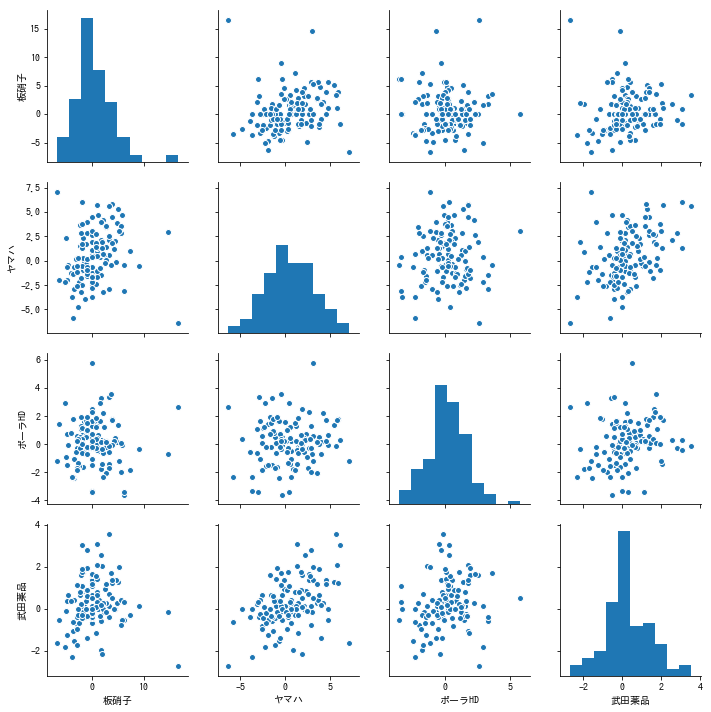

In [40]:
sns.pairplot(data)

In [58]:
# シャピロウィルクの検定、帰無仮説は正規分布に従う
for row in data.iteritems():
    print(row[0])
    print(scipy.stats.shapiro(row[1]))

板硝子
(0.9240832328796387, 4.189378159935586e-06)
ヤマハ
(0.9949772357940674, 0.9483349919319153)
ポーラHD
(0.9832317233085632, 0.14187775552272797)
武田薬品
(0.9846038818359375, 0.18925489485263824)


- 教科書では、板硝子は棄却（正規分布ではない）、他の３つは帰無仮設が受容されるため、収益率が正規分布に従っていると判断しても良い。となっているが、多重比較してしまっているのではないか？

In [89]:
data_price = pd.DataFrame(np.array([robjects.r['X.price'], robjects.r['Y.price']]).T, columns=['price_x', 'price_y'])

In [90]:
data_return = pd.DataFrame(np.array([robjects.r['X.return'], robjects.r['Y.return']]).T, columns=['return_x', 'return_y'])

In [96]:
data = data_price.join(data_return)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb7549f128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feb7544a940>]], dtype=object)

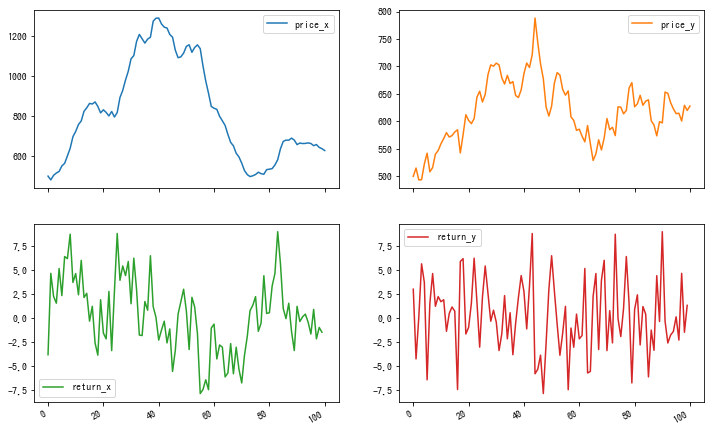

In [103]:
data.plot(kind='line', subplots=True, layout=(2,2), figsize=(12,8))

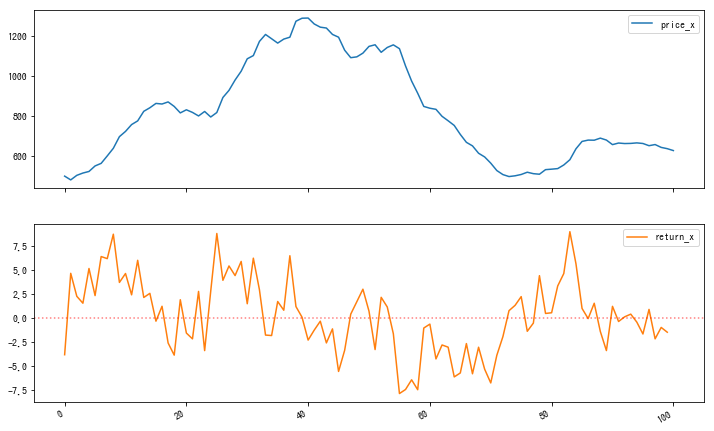

In [124]:
data_x = data[['price_x', 'return_x']]
a = data_x.plot(kind='line', subplots=True, figsize=(12,8))
a[1].axhline(y=0, c='r', ls=':', alpha=0.5)

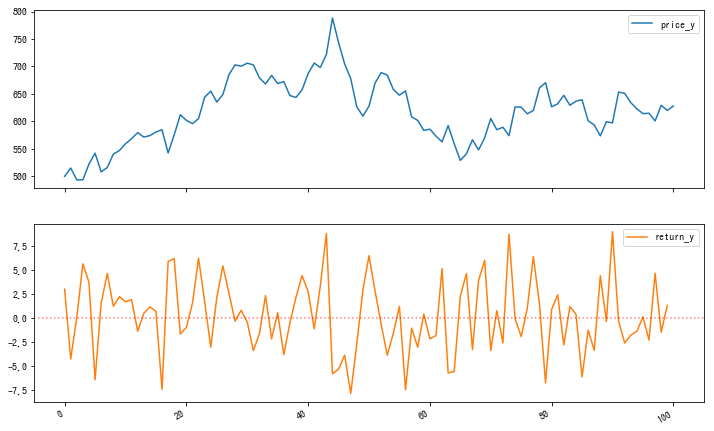

In [126]:
data_y = data[['price_y', 'return_y']]
a = data_y.plot(kind='line', subplots=True, figsize=(12,8))
a[1].axhline(y=0, c='r', ls=':', alpha=0.5)

In [130]:
profit = data[['return_x', 'return_y']]
profit.describe()

,return_x,return_y
count,100.000000,100.000000
mean,0.228029,0.228029
std,3.784666,3.784666
min,-7.896230,-7.896230
25%,-2.223212,-2.223212
50%,0.387017,0.387017
75%,2.439527,2.439527
max,8.987181,8.987181


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb742757f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feb7420c7b8>]], dtype=object)

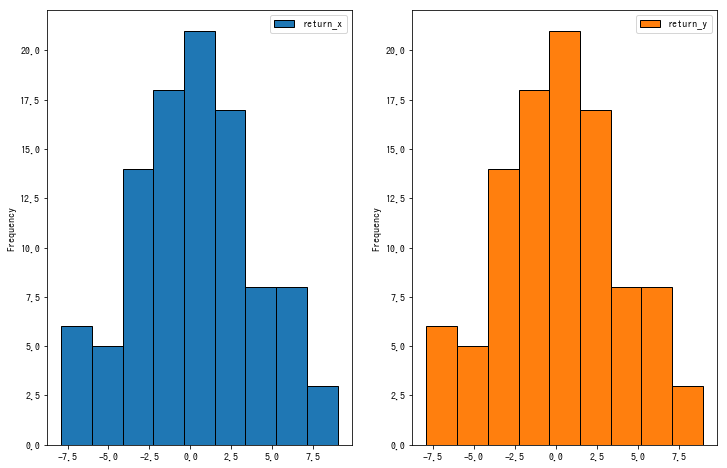

In [134]:
profit.plot(kind='hist', subplots=True, layout=(1,2), edgecolor='black', figsize=(12, 8), bins=9)